## Import required modules

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools

import warnings
warnings.filterwarnings("ignore",category=mpl.cbook.mplDeprecation)

from scipy import stats
import statsmodels.stats.multitest as smt
from math import sqrt

import session_info
session_info.show()

In [2]:
# import a module given the full path?
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/_utils.py")
_utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = _utils
spec.loader.exec_module(_utils)

## Functions

In [3]:
def rank_genes_groups_to_df(adata, cell):
    
    dic = adata.uns['rank_genes_groups'] 
    
    df = pd.DataFrame({
        'names' : dic['names'][cell],
        'scores' : dic['scores'][cell],
        'pvals' : dic['pvals'][cell],
        'pvals_adj' : dic['pvals_adj'][cell],
        'logfoldchanges' : dic['logfoldchanges'][cell]
    })
    
    return df

# rank_genes_groups_to_df(sanp, 'SAN_P_cell')

## Read in anndata

In [4]:
# anndata which includes 
adata_vis = _utils.read_visium('/nfs/team205/heart/anndata_objects/8regions/visium-OCT_adult-8reg_raw.h5ad')
adata_vis

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


AnnData object with n_obs × n_vars = 55049 × 22055
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'annotation_JC', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'region_cell2loc', 'annotation_final', 'Adip1', 'Adip2', 'B', 'B_plasma', 'CD14+Mo', 'CD16+Mo', 'CD4+T_act', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans', 'DC', 'EC10_CMC-like', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_atria', 'EC8_ln', 'FB1', 'FB2', 'FB3', 'FB4', 'FB5', 'FB6', 'ILC', 'LYVE1+IGF1+MP', 'LYVE1+MP_cycling', 'LYVE1+TIMD4+MP', 'MAIT-like', 'Mast', 'MoMP', 'NC1', 'NC2', 'NK_CD16hi', 'NK_CD

In [5]:
adata_vis.obs['annotation_final'].value_counts()

myocardium                  35031
myocardium_ventricular       7047
epicardium_subepicardium     3207
fibrosis                     2342
cardiac_skeleton             2304
adipose_tissue               1466
node                          999
endocardium                   840
vessel                        790
myocardium_atrial             527
AV_bundle                     452
nerve                          44
Name: annotation_final, dtype: int64

## Quantification of Ig genes in each annotated structure

In [6]:
regions = ['RV','LV','RA','LA']

adata_sub = adata_vis[adata_vis.obs['region'].isin(regions)]
adata_sub

View of AnnData object with n_obs × n_vars = 27514 × 22055
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'annotation_JC', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'region_cell2loc', 'annotation_final', 'Adip1', 'Adip2', 'B', 'B_plasma', 'CD14+Mo', 'CD16+Mo', 'CD4+T_act', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans', 'DC', 'EC10_CMC-like', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_atria', 'EC8_ln', 'FB1', 'FB2', 'FB3', 'FB4', 'FB5', 'FB6', 'ILC', 'LYVE1+IGF1+MP', 'LYVE1+MP_cycling', 'LYVE1+TIMD4+MP', 'MAIT-like', 'Mast', 'MoMP', 'NC1', 'NC2', 'NK_CD16hi'

In [25]:
# DE test
sc.tl.rank_genes_groups(adata_sub,groupby='annotation_final',groups=['epicardium_subepicardium'],ref='all',method='wilcoxon')

Trying to set attribute `.uns` of view, copying.


In [28]:
res = rank_genes_groups_to_df(adata_sub, cell='epicardium_subepicardium')
res[res['names'].isin(['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1'])]

,names,scores,pvals,pvals_adj,logfoldchanges
324,IGHG3,8.198825,2.427483e-16,6.063210e-15,3.200209
360,IGHG4,7.130781,9.980122e-13,2.106331e-11,2.648223
556,IGHG1,4.332985,1.471008e-05,1.752733e-04,2.960334
717,IGHA1,3.121849,1.797191e-03,1.508653e-02,2.570676
2017,IGHG2,0.675277,4.994998e-01,1.000000e+00,3.043642


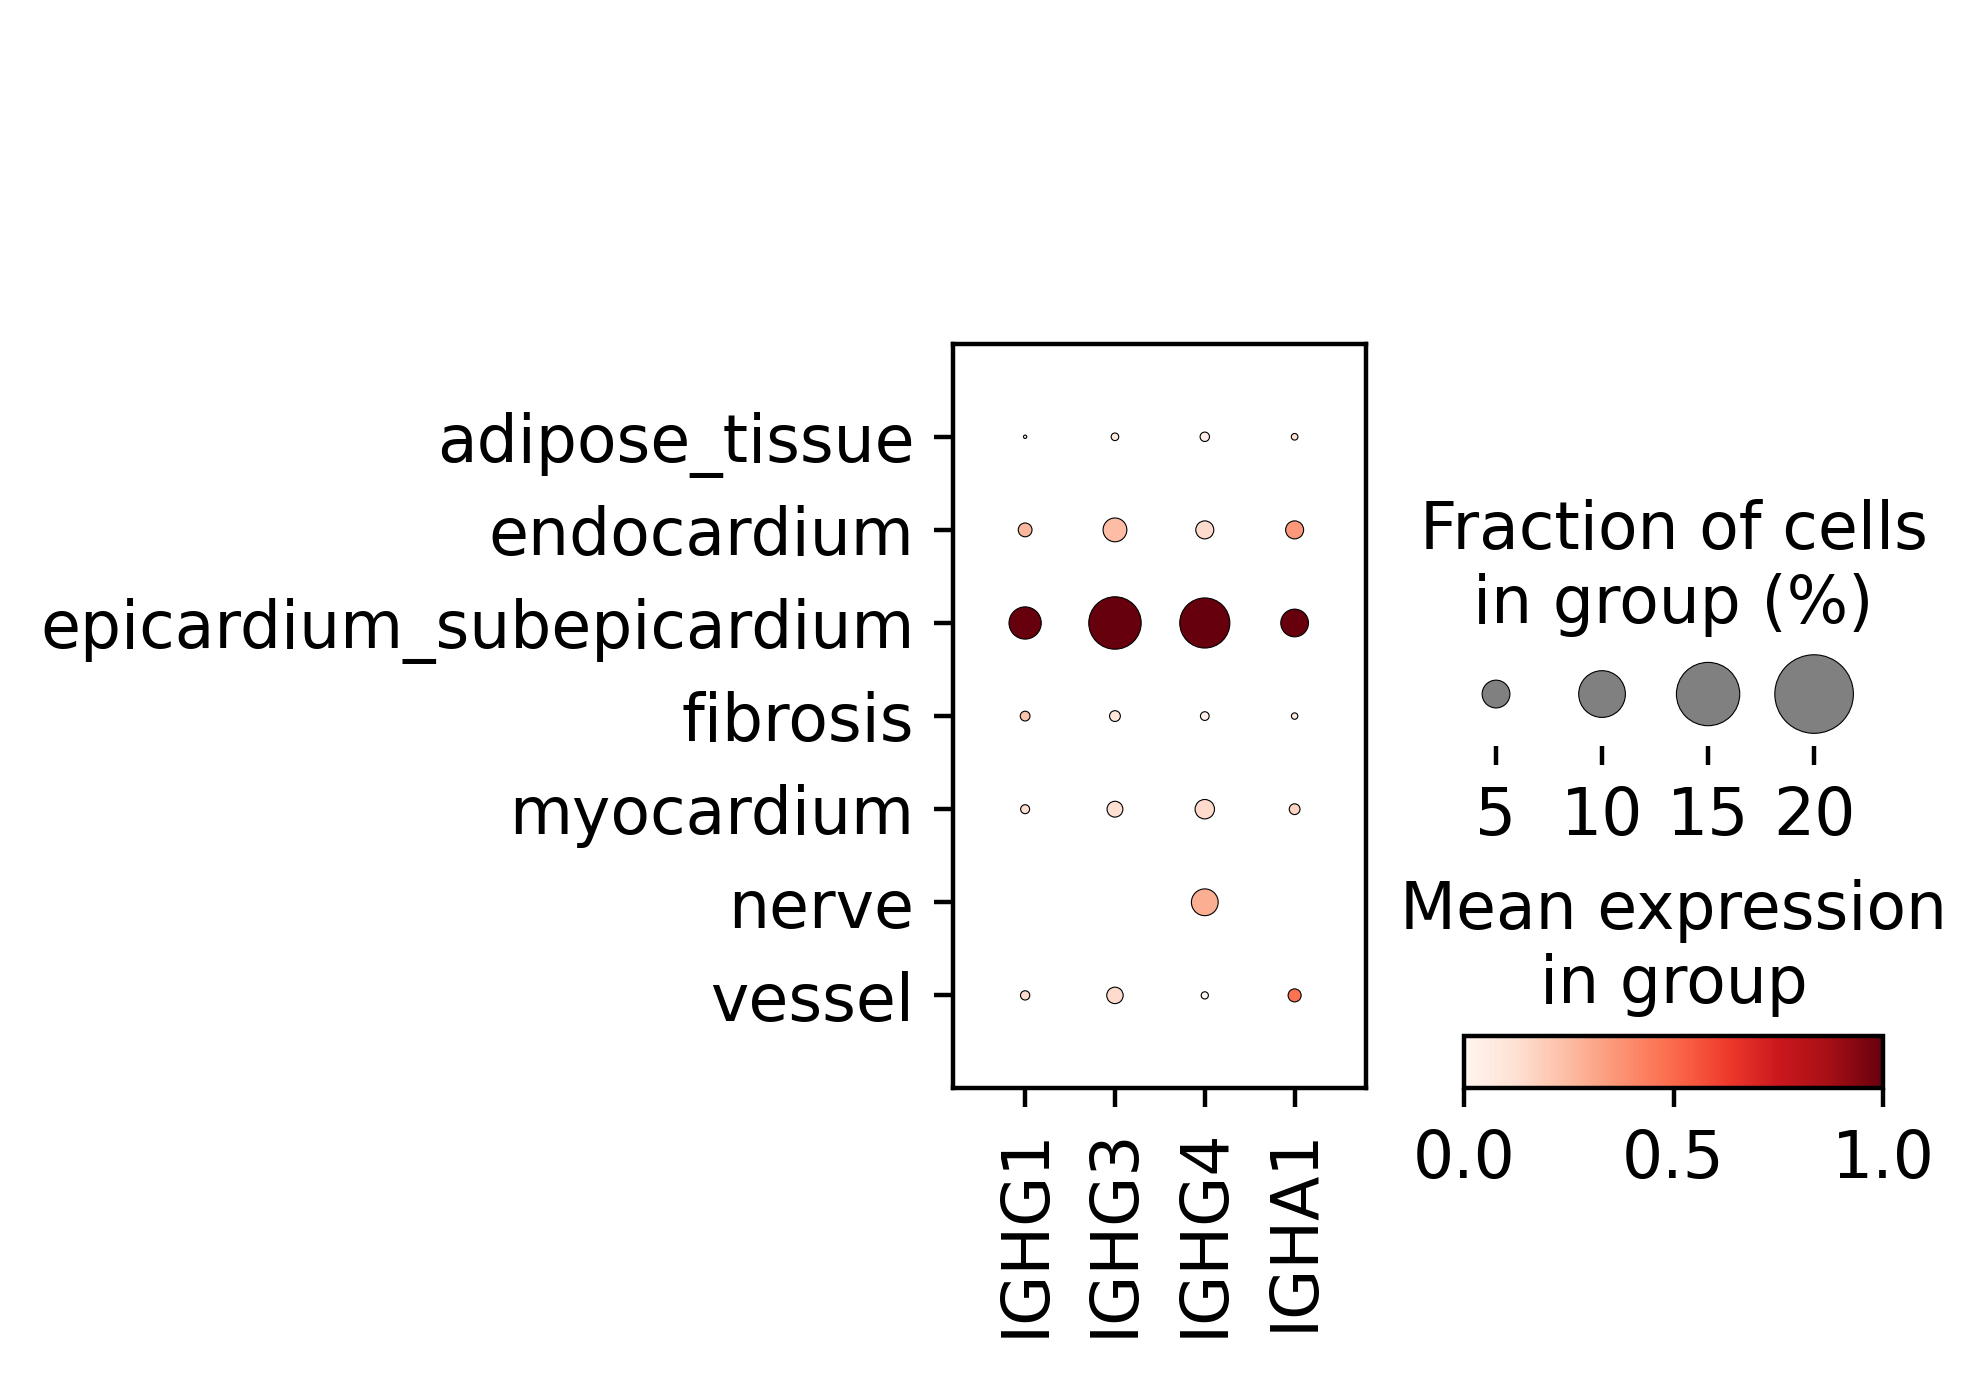

In [29]:
sc.pl.dotplot(adata_sub, 
                  ['IGHG1','IGHG3','IGHG4','IGHA1'], 
                  groupby='annotation_final',
                  dendrogram=False,
                  # use_raw=True,
                  standard_scale="var",
                  color_map="Reds",
                 swap_axes=False,
                 # title='Neurexin receptors'
                 )

## Correlation of Ig genes in epicardium-subepicardium

In [7]:
IGs=['IGHG1','IGHG3','IGHG4','IGHA1'] # significantly enriched Ig genes

# epicardium spots
df=adata_sub[adata_sub.obs['annotation_final']=='epicardium_subepicardium'].to_df()
print(len(df))

ig_df=pd.DataFrame(list(itertools.combinations_with_replacement(IGs,2)))

for i in ig_df.index:
    ig0=ig_df.loc[i,0]
    ig1=ig_df.loc[i,1]
    
    df_s=df[(df[ig0]>0)|(df[ig1]>0)]
    corr,pval=stats.spearmanr(df_s[ig0], df_s[ig1])
    
    ig_df.loc[i,'corr']=corr.copy()
    ig_df.loc[i,'pval']=pval.copy()
    
    ig_df.loc[i,'0_pos-rate']=sum(df[ig0]>0)/len(df)
    ig_df.loc[i,'1_pos-rate']=sum(df[ig1]>0)/len(df)
    ig_df.loc[i,'pos-rate']=(sum(df[ig0]>0)/len(df))*(sum(df[ig1]>0)/len(df))

ig_df['pval_adj']=smt.multipletests(ig_df['pval'], method='bonferroni', is_sorted=False, returnsorted=False)[1]

2771


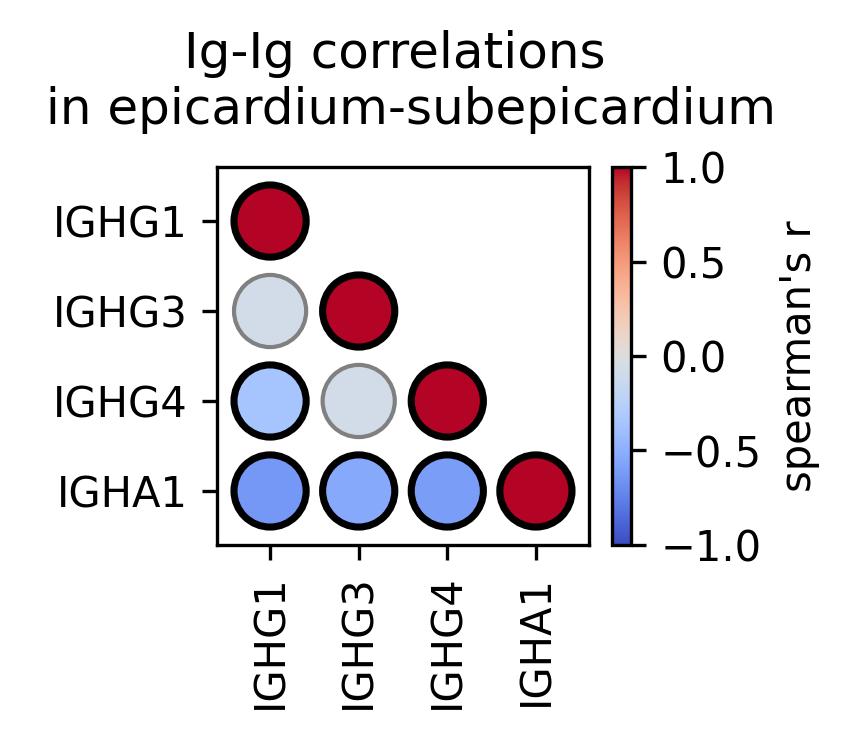

In [9]:
# plot
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.figsize'] = 2.8,2.6
plt.rcParams["figure.dpi"] = 300
plt.rcParams['axes.titley'] = 1.05

edgecolor=['black' if x<0.05 else 'grey' for x in ig_df['pval_adj']]
linewidths=[1.7 if x<0.05 else 1 for x in ig_df['pval_adj']]
plt.scatter(x=ig_df[0],y=ig_df[1],s=300,c=ig_df['corr'],
            cmap='coolwarm',edgecolor=edgecolor,linewidths=linewidths)
plt.xticks(rotation=90)
plt.clim(-1, 1)
plt.margins(x=0.2,y=0.2)
plt.gca().invert_yaxis()
plt.title('Ig-Ig correlations \n in epicardium-subepicardium')

cbar=plt.colorbar()
cbar.set_label("spearman's r", rotation=90)

plt.tight_layout()
plt.savefig('/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/Revision/figures/IGs_correlation_in-epi.pdf')
plt.show()